<a href="https://colab.research.google.com/github/veldandishiva/python-and-DA-bootcamp.-py/blob/main/Shivasai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

READING THE DATA FILE

In [ ]:
x=pd.DataFrame(pd.read_csv('/content/5_6237491127495164923.csv'))
x. head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
x. tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


 Above data is list of passengers in Titanic and about Titanic survivals and also about the general information of passengers. And how many people survived. 
The data survived encloses with 1 and 0.1 means survived and 0 indicates not survived

     1) NULL VALUES

In [ ]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Separating the columns which have 35%  data is missing in the datasheet

In [ ]:
 
 
y=x.isnull(). sum()
col=y[y>(35/100 * x.shape[0])]
col

Cabin    687
dtype: int64

In [ ]:
col.index

Index(['Cabin'], dtype='object')

 No.of rows,columns indicated by using shape[]

In [ ]:
x.shape[0:]

(891, 12)

In [ ]:
x. corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Sibsp:Number of siblings/spouses abroad
Patch:Number of parents / children abroad

3) female/male survived mean

In [ ]:
x['sex']=[0 if x['Sex'][i]=='male' else 1 for i in x. index]
x.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

 Here 1 is indicated as female and 0 as male. 
As you can see by above mean statistics
the female passengers surviving chances is higher than males ones.

4) SURVIVED PEOPLE ACCORDING TO THE DIFFERENT PLACES PASSENGERS ARE ENTER INTO SHIP.

In [ ]:
x.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

 C is Cherbourg 
 Q is Queenstown
 S is Southampton. 
 By above data we conclude that person 
 Who borded and attended the ship at    different places. 
 We can see the person came at the place of cherbourg is surviving chances is higher than person who attended/borded to ship at Q, S places. 
By mean statistics the C place passengers who attended ship at C place  is surviving rate is higher chances for the C passengers.

5) CLASS TICKET SURVIVING CHANCES

In [ ]:
x.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

 Class 1 chances is higher surviving chances than remaining two other classes(class2, class 3).Richer people surviving chances are higher than class 2 and class 3 passengers. Class2 passengers surviving higher than class 3 passengers but less than class 1 passengers

  We can make new column fs by combining
 these two columns parch, sibsp.Here fs denotes family_size.

6) Family and alone peoples in the ship
and survival rate.

In [ ]:
x['fs']=x['SibSp']+x['Parch']
x. drop(['SibSp', 'Parch'],axis=1,inplace=True) 
x.corr()

,PassengerId,Survived,Pclass,Age,Fare,fs
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.301914
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,0.217138
fs,-0.040143,0.016639,0.065997,-0.301914,0.217138,1.000000


In [ ]:
x['Alone']=[0 if x['fs'][i]>0 else 1 for i in x.index]
x.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,fs,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,NaN,C,1,0


In [ ]:
x.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,fs,Alone
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,7534,9.8458,NaN,S,0,1
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,349212,7.8958,NaN,S,0,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,349217,7.8958,NaN,S,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,11767,83.1583,C50,C,1,0
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,230433,26.0000,NaN,S,1,0
881,882,0,3,"Markun, Mr. Johann",male,33.0,349257,7.8958,NaN,S,0,1
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,7552,10.5167,NaN,S,0,1
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,C.A./SOTON 34068,10.5000,NaN,S,0,1
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,SOTON/OQ 392076,7.0500,NaN,S,0,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,382652,29.1250,NaN,Q,5,0


 The above data says that whether person is alone. If person is alone then 0 
 
indicate he/she is alone and 1 indicate
he/she is not alone or with the family

In [ ]:
x['Alone']=[0 if x['fs'][i]>0 else 1 for i in x.index]
x.groupby(['Alone']) ['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

Surviving rate of people without family is high than people who holding with the family.

 7)Surviving chances higher for below 19 years group or above 19 year group?

In [ ]:
x['Age']=[0 if x['Age'][i]<19 else 1for i in x. index]
 
 
x.groupby(['Age']) ['Survived'].mean()

Age
0    0.503597
1    0.361702
Name: Survived, dtype: float64

0 indicate age less than 19 years 1 indicate age is greater than 19 years
Below 19 years age group surviving chances are higher than above 19 years age group.

GRAPHS:

In [ ]:
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

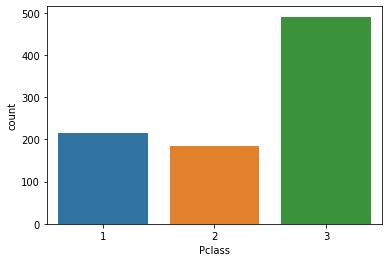

In [ ]:
 
Passengers=pd.read_csv('/content/5_6237491127495164923.csv') 
sb.countplot(data=Passengers,x='Pclass')

 Class 1 , class 2 , class 3 passengers 
are shown above graph. Class 3 passengers are more than class1 and class2 pasengers.

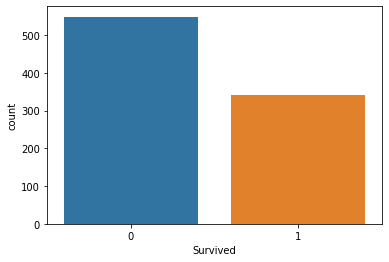

In [ ]:
Passengers=pd.read_csv('/content/5_6237491127495164923.csv')
sb.countplot(data=Passengers, x='Survived')

 Survive people indicated as 1 . 0 indicated as died people. Survived are very less. The above graph shows about  number of people survived people and died people.

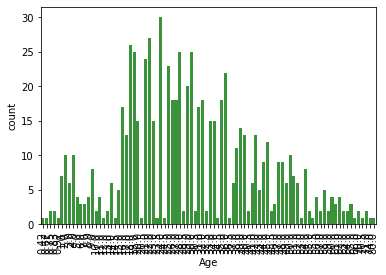

In [ ]:
base_color = sb.color_palette()[2]
sb.countplot(data=Passengers,x='Age', color=base_color)
plt.xticks(rotation=90);

 Above graph shown no. Of people according to different age.

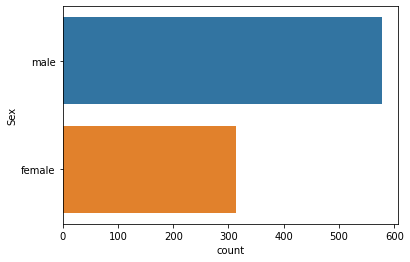

In [ ]:
sb.countplot(data=Passengers, y='Sex')

 Number of males and females shown in the graph

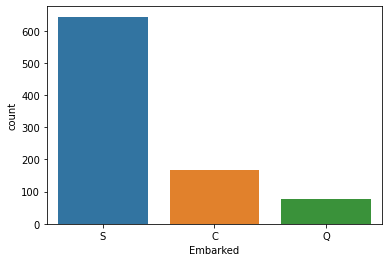

In [ ]:
sb.countplot(data=Passengers,x='Embarked')

No. Of people attended at the ship at different places shown in the graph. 
S='Southampton' c='cherbourg', Q='queentown'

8)CONCLUSION:

1) Male passengers are more in the ship compare to the female passengers.

 2) female passengers have higher chances of surviving than the male passengers.

 3)passengers travelling with family having higher surviving rate than alone.

 4)passengers who borded the ship at cherbourg survived more in proportion.

 5)  Below age 19 years group survived more in proportion than above 19 years age group.

6) More passengers took the class 3 ticket. Very few members took the class 1 tickets.

 7) class 1 passenger have more proportion of surviving rather than class2 and class3.

 8) Survived people are very less than died people. Died passengers  are more than survived passengers.